In [1]:
import sklearn as s


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\python\student_info.csv')
data.head()


,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
data.shape

(200, 2)

In [5]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

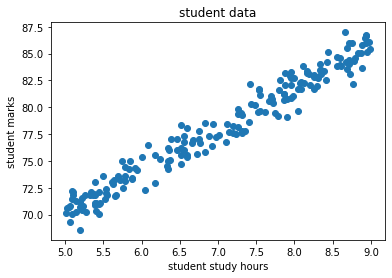

In [6]:
plt.scatter(x = data.study_hours ,y=data.student_marks)
plt.title("student data")
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.show()

In [7]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [8]:
data = data.fillna(data.mean())
data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [9]:
x=data.drop(columns = 'student_marks')
y=data.drop(columns = 'study_hours')
x.shape , y.shape

((200, 1), (200, 1))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=51 , test_size=0.2)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
lr=LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [14]:
lr.score(x_test,y_test)

0.9514124242154464

In [15]:
lr.intercept_

array([50.44735504])

In [16]:
pred = lr.predict(x_test)
pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [17]:
y_test

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [18]:
pd.DataFrame(np.c_[x_test , y_test , pred] , columns = ["Study Hours","Original Marks","Predicted Marks"])

,Study Hours,Original Marks,Predicted Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [19]:
lr.score(x_test,y_test)

0.9514124242154464

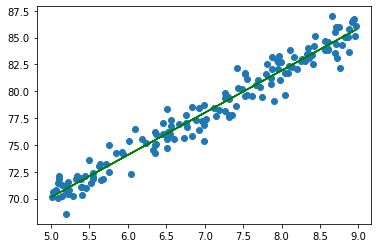

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color ='g')

In [21]:
import joblib

In [22]:
joblib.dump(lr , "Student_Marks_Prediction_Model.pkl")

['Student_Marks_Prediction_Model.pkl']

In [23]:
model = joblib.load("Student_Marks_Prediction_Model.pkl")

In [24]:
model.predict([[1]])[0][0]

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.38307305359076

In [25]:
data.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


In [26]:
y_test

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [27]:
model.predict([[8.6]])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[84.29452998]])

In [1]:
!pip list


Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2